# Pytorch

The core library in PyTorch, **`torch`** provides a range of functionalities for tensor computations, mathematical operations, and overall framework support for building and training deep learning models. It allows seamless execution on CPU and GPU, making it efficient for various ML tasks.


---



## Tensor

In PyTorch, a **tensor** is a multi-dimensional array, similar to arrays or matrices in **`NumPy`**, but with additional capabilities. Tensors are the primary data structure in PyTorch and play a crucial role in building and training deep learning models. Below is a breakdown of the main features, types, and uses of tensors in PyTorch.

## 1. What is a Tensor?
- A tensor in PyTorch is a generalization of matrices to an arbitrary number of dimensions.
- Tensors can have 0 to N dimensions:
  - **0-dimensional tensor** (scalar): Represents a single value.
  - **1-dimensional tensor** (vector): Represents a one-dimensional array of values.
  - **2-dimensional tensor** (matrix): Represents a two-dimensional array.
  - **N-dimensional tensor** (nD array): Represents data with more complex structures, often used in deep learning for handling images, audio, video, etc.

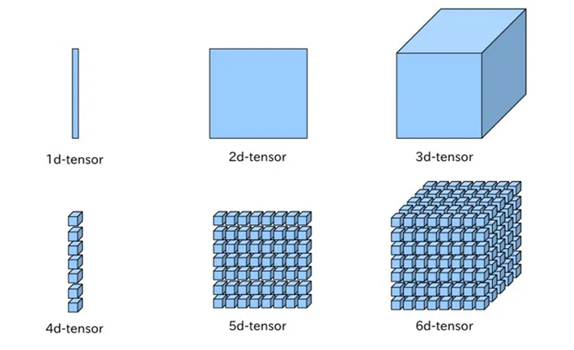

In [1]:
import torch
scalar = torch.tensor(5)           # 0-D tensor
vector = torch.tensor([1, 2, 3])   # 1-D tensor
matrix = torch.tensor([[1, 2], [3, 4]])  # 2-D tensor

## 2. Tensor Properties

- **Shape**: The dimensions of a tensor, accessed via `.shape`. For instance, a tensor with shape $(2, 3)$ is a $2 \times 3$ matrix.

- **Data Type (dtype)**: PyTorch supports various data types, including `torch.float32`, `torch.int64`, etc.

- **Device**: Tensors can be moved between devices, such as CPU and GPU, allowing computations to be parallelized and accelerated.


In [2]:
tensor = torch.tensor([[1.0, 2.0], [3.0, 4.0]], dtype=torch.float32)
print(tensor.shape)  # Output: torch.Size([2, 2])
print(tensor.dtype)  # Output: torch.float32

torch.Size([2, 2])
torch.float32


## 3. Creating Tensors

PyTorch offers various ways to create tensors:

- **Directly from data**: Using `torch.tensor()`.
- **Predefined functions**: Using functions like `torch.zeros`, `torch.ones`, `torch.rand`, and `torch.arange`.
- **From NumPy arrays**: Converting a NumPy array to a tensor with `torch.from_numpy()`.

Each function allows specifying `dtype` and `device`.


In [3]:
# Creating a tensor of zeros
zeros_tensor = torch.zeros((3, 3))
print(zeros_tensor)

# Creating a random tensor
random_tensor = torch.rand((3, 3))
print(random_tensor)

# Creating a tensor from a NumPy array
import numpy as np
numpy_array = np.array([[1, 2], [3, 4]])
tensor_from_numpy = torch.from_numpy(numpy_array)
print(tensor_from_numpy)

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])
tensor([[0.4134, 0.6219, 0.0442],
        [0.9243, 0.8074, 0.2648],
        [0.5229, 0.1299, 0.3815]])
tensor([[1, 2],
        [3, 4]])


## 4. Basic Tensor Operations

Tensors support various mathematical operations, including element-wise and matrix multiplications, as well as in-place operations.

- **Common operations**: Addition, subtraction, multiplication, division, exponentiation, etc.
- **Broadcasting**: PyTorch allows easy broadcasting, meaning smaller tensors can be expanded to match the shape of larger ones for operations.
- **Indexing and slicing**: Similar to NumPy arrays, allowing you to access and modify specific tensor elements.


In [4]:
a = torch.tensor([[1, 2], [3, 4]])
b = torch.tensor([[5, 6], [7, 8]])
a, b

(tensor([[1, 2],
         [3, 4]]),
 tensor([[5, 6],
         [7, 8]]))

In [5]:
print(a + b)  # Element-wise addition
print(a @ b)  # Matrix multiplication

tensor([[ 6,  8],
        [10, 12]])
tensor([[19, 22],
        [43, 50]])


In [ ]:
# In-place operations
a.add_(b)
print(a)

a.mul_(2)
print(a)

### Matrix Multiplication vs. Element-wise Multiplication

PyTorch supports two types of multiplication for tensors:
- **Matrix Multiplication**: Use `.matmul()` for matrix multiplication (dot product).
- **Element-wise Multiplication**: Use `*` or `.mul()` for element-wise multiplication, where each element in one tensor is multiplied by the corresponding element in another tensor.

In [ ]:
m1 = torch.FloatTensor([[1, 2], [3, 4]])
m2 = torch.FloatTensor([[1], [2]])
m1,m2

In [ ]:
# Matrix multiplication
print(m1.matmul(m2))

In [ ]:
# Element-wise multiplication with broadcasting
print(m1 * m2)

### 2. Mean and Sum

PyTorch offers functions to calculate the mean and sum of tensor elements:

- **`.mean()`**: Computes the average of all elements.
- **`.sum()`**: Computes the sum of all elements.

You can specify a dimension with the `dim` argument to perform these operations along a specific axis.


In [ ]:
t = torch.FloatTensor([[1, 2], [3, 4]])

# Mean of all elements
print(t.mean())  # Output: tensor(2.5)

# Mean along dimension 0 (columns)
print(t.mean(dim=0))  # Output: tensor([2., 3.])

# Sum along dimension 1 (rows)
print(t.sum(dim=1))  # Output: tensor([3., 7.])

### 3. Max and ArgMax

- **`.max()`**: Returns the maximum value in a tensor. If `dim` is specified, it returns the max value along that dimension.
- **`.argmax()`**: Returns the index of the maximum value along a specified dimension.


In [ ]:
t = torch.FloatTensor([[1, 2], [3, 4]])
print(t)

In [ ]:
# Max of all elements
print(t.max())

# Max and argmax along dimension 0 (columns)
print(t.max(dim=0))

# Max and argmax along dimension 1 (row)
print(t.max(dim=1))

## 5. Autograd: Automatic Differentiation with Tensors

Tensors are integrated with PyTorch's `autograd`, which is essential for deep learning models.

- **Enabling gradients**: By setting `requires_grad=True`, PyTorch will automatically calculate gradients for operations involving that tensor, which is useful for backpropagation in neural networks.
- **Using gradients**: The gradients can then be used to adjust weights in a model during training.


### Example 1: Basic Gradient Calculation

In this example, we compute the gradient of the function $y = x^2$ with respect to $x$.

- **Function**: $y = x^2$
- **Gradient**: $\frac{dy}{dx} = 2x$

For $x = 2$:


- $
\frac{dy}{dx} = 2 \cdot 2 = 4
$

In [ ]:
x = torch.tensor(2.0, requires_grad=True)
y = x ** 2  # Some operation on x
y.backward()  # Calculates the gradient of y with respect to x
print(x.grad)  # Output: tensor(4.0)

### Example 2: Gradient Calculation with Multiple Operations

Here, we compute the gradient of $y = x^2 + 3x + 5$ with respect to $x$.

- **Function**: $y = x^2 + 3x + 5$
- **Gradient**: $\frac{dy}{dx} = 2x + 3$

For $x = 3$:
- $
\frac{dy}{dx} = 2 \cdot 3 + 3 = 9 $

In [ ]:
x = torch.tensor(3.0, requires_grad=True)
y = x ** 2 + 3 * x + 5  # Function y = x^2 + 3x + 5
y.backward()
print(x.grad)  # Output: tensor(9.0), as dy/dx = 2x + 3 = 9 when x = 3

### Example 3: Using Multiple Variables

In this example, we compute the partial derivatives of $y = x^2 + z^2$ with respect to both $x$ and $z$.

- **Function**: $y = x^2 + z^2$
- **Partial Derivatives**:
  - With respect to $x$: $\frac{\partial y}{\partial x} = 2x$
  - With respect to $z$: $\frac{\partial y}{\partial z} = 2z$

For $x = 2$ and $z = 3$:
- $
\frac{\partial y}{\partial x} = 2 \cdot 2 = 4
$
- $
\frac{\partial y}{\partial z} = 2 \cdot 3 = 6
$


In [ ]:
x = torch.tensor(2.0, requires_grad=True)
z = torch.tensor(3.0, requires_grad=True)
y = x ** 2 + z ** 2
y.backward()
print(x.grad)  # Output: tensor(4.0), as dy/dx = 2x = 4 when x = 2
print(z.grad)  # Output: tensor(6.0), as dy/dz = 2z = 6 when z = 3


### Example 4: Vector Function Gradient

We calculate the gradient of $y = x \cdot x$ element-wise for $x = [1, 2, 3]$.

- **Function**: $y = x^2$
- **Element-wise Gradient**:
  - For $x_1$: $\frac{dy_1}{dx_1} = 2 \cdot x_1$
  - For $x_2$: $\frac{dy_2}{dx_2} = 2 \cdot x_2$
  - For $x_3$: $\frac{dy_3}{dx_3} = 2 \cdot x_3$

So:
- $
\frac{dy}{dx} = [2 \cdot 1, 2 \cdot 2, 2 \cdot 3] = [2, 4, 6]
$


In [ ]:
x = torch.tensor([1.0, 2.0, 3.0], requires_grad=True)
y = x * x  # Element-wise square, y is now [1, 4, 9]
y.backward(torch.tensor([1.0, 1.0, 1.0]))  # Specify gradient vector
print(x.grad)  # Output: tensor([2.0, 4.0, 6.0]), element-wise gradients


### Example 6: Detaching Tensors
Detaching a tensor stops gradient tracking for that tensor without affecting other parts of the computation graph.

In [ ]:
x = torch.tensor(2.0, requires_grad=True)
with torch.no_grad():
    y = x ** 2
print(y.requires_grad)  # Output: False, gradients are not tracked
#y.backward()
#print(x.grad)  # Output: None, x.grad is not computed

### Example 7: Accumulating Gradients with Multiple Backward Calls

This example demonstrates gradient accumulation. Here, we compute gradients for two functions, $y_1 = x^2$ and $y_2 = x^3$, and accumulate the results.

1. **Function 1**: $y_1 = x^2$
   - Gradient: $\frac{dy_1}{dx} = 2x$
2. **Function 2**: $y_2 = x^3$
   - Gradient: $\frac{dy_2}{dx} = 3x^2$

For $x = 2$:
- $
\frac{dy_1}{dx} = 2 \cdot 2 = 4
$
- $
\frac{dy_2}{dx} = 3 \cdot 2^2 = 12
$

Accumulated gradient:
- $
\frac{dy}{dx} = \frac{dy_1}{dx} + \frac{dy_2}{dx} = 4 + 12 = 16
$

In [ ]:
x = torch.tensor(2.0, requires_grad=True)
y1 = x ** 2
y1.backward(retain_graph=True)  # Keeps computation graph for further backward calls
print(x.grad)  # Output: tensor(4.0)

y2 = x ** 3
y2.backward()  # Accumulates gradient from y2
print(x.grad)  # Output: tensor(16.0), as dy1/dx + dy2/dx = 4 + 12 = 16


### Example 8: Gradient Clipping

Gradient clipping is applied to limit gradient values within a specified range (e.g., -10 to 10). There’s no specific mathematical formula for clipping itself, but it can be expressed as:


- $\text{clipped_gradient} = \min(\max(\text{gradient}, -10), 10)$


For the example tensor `[10.0, -15.0, 20.0]`, clipping the values results in `[10.0, -10.0, 10.0]`.

In [ ]:
# Assume a gradient tensor for demonstration
grad_tensor = torch.tensor([10.0, -15.0, 20.0], requires_grad=True)

# Clip gradients to have maximum absolute value of 10
clipped_grad_tensor = grad_tensor.clamp(-10, 10)
print(clipped_grad_tensor)  # Output: tensor([10.0, -10.0, 10.0])


## 6. Moving Tensors to GPU

In PyTorch, we can move tensors and models to the GPU to significantly accelerate computations. Let’s explore how this works and understand the role of CUDA and GPU in deep learning.

### What is a GPU?
- **GPU (Graphics Processing Unit)**:
  - A specialized processor designed to handle parallel computations efficiently. Originally developed for rendering graphics, GPUs excel at performing repetitive, large-scale calculations, making them ideal for tasks in deep learning.
- **Comparison with CPU**:
  - CPUs are designed for general-purpose computing with a few powerful cores that perform well on sequential tasks.
  - GPUs have thousands of smaller cores that can execute many calculations in parallel, which is beneficial for deep learning where operations often involve large matrices and vectors.
  
Using GPUs can greatly reduce the training time for deep learning models, especially with large datasets or complex neural networks.

---

### What is CUDA?
- **CUDA (Compute Unified Device Architecture)**:
  - A parallel computing platform and API created by NVIDIA that allows direct interaction with NVIDIA GPUs.
- **CUDA in PyTorch**:
  - PyTorch uses CUDA to perform computations on NVIDIA GPUs. By specifying `device="cuda"`, you tell PyTorch to run the operations on a GPU, leveraging CUDA for accelerated computation.
  
PyTorch provides an easy interface to transfer tensors and models to and from the GPU with `.to('cuda')`, allowing you to take advantage of CUDA’s parallel processing capabilities.

---

### Example: Moving Tensors to GPU
To perform computations on a GPU in PyTorch, you can:
1. Check if a GPU (CUDA) is available using `torch.cuda.is_available()`.
2. Move tensors or models to the GPU with `.to('cuda')`.



In [ ]:
# Check if CUDA is available
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

# Move tensor to GPU if available
tensor = torch.tensor([1.0, 2.0, 3.0])
tensor = tensor.to(device)
print(tensor)

## Benefits of Using GPU with CUDA in PyTorch

- **Faster Training**:
  - Leveraging GPU with CUDA can speed up training, especially for large datasets and complex models, as GPUs can handle large-scale matrix and tensor operations in parallel.
- **Scalability**:
  - GPUs enable scaling models to larger datasets and higher batch sizes, which is often essential for deep learning.
- **Memory Efficiency**:
  - GPUs typically have their own dedicated memory, allowing better management and faster access to data during computation.

---

## Practical Tips for Using GPU with CUDA

- **Batch Data**:
  - Since GPUs work best with parallelized operations, using larger batch sizes can optimize performance.
- **Monitor GPU Memory**:
  - GPU memory is limited, so it’s essential to monitor memory usage to avoid out-of-memory errors.
- **Use `.cpu()` to Transfer Back**:
  - After computations, if you need to use the tensor on the CPU, use `.cpu()` to transfer it back.


In [ ]:
# Moving tensor back to CPU
tensor_cpu = tensor.to("cpu")
print(tensor_cpu)

### Example of Incompatible Operations Between CPU and GPU Tensors

In PyTorch, tensors must be on the same device (either CPU or GPU) to perform operations together. If you attempt to perform an operation between a CPU tensor and a GPU tensor, PyTorch will raise an error. Below is an example that demonstrates this incompatibility.


In [ ]:
# Create a tensor on the CPU
cpu_tensor = torch.tensor([1.0, 2.0, 3.0])

# Create a tensor on the GPU (if available)
if torch.cuda.is_available():
    gpu_tensor = torch.tensor([1.0, 2.0, 3.0], device="cuda")

    # Attempt to add the CPU tensor and GPU tensor
    try:
        result = cpu_tensor + gpu_tensor
    except RuntimeError as e:
        print("Error:", e)

### Solution:
- Tensors must be on the same device (either CPU or GPU) for operations between them. To resolve this, transfer one tensor to the device of the other, e.g., by using `.to("cuda")` or `.to("cpu")` as needed.


In [ ]:
# Move the CPU tensor to GPU and perform the addition
cpu_tensor = cpu_tensor.to("cuda")

# or Move the GPU tensor to CPU and perform the addition
#gpu_tensor = gpu_tensor.to("cpu")

result = cpu_tensor + gpu_tensor  # Now both tensors are on the GPU
print("Result:", result)

## 7. Tensor Broadcasting in PyTorch

**Tensor Broadcasting** is a powerful feature in PyTorch that allows tensors with different shapes to be used together in element-wise operations. Instead of requiring tensors to have identical shapes, PyTorch can automatically "broadcast" the smaller tensor across the larger tensor to make their shapes compatible.

### How Broadcasting Works

Broadcasting follows specific rules to expand the dimensions of a tensor. PyTorch applies these rules so that the smaller tensor can be repeated across the larger tensor's dimensions, making it compatible for operations like addition, subtraction, multiplication, etc.

### Broadcasting Rules

1. **Right-Align Dimensions**:
  - PyTorch compares the dimensions from the rightmost side (or trailing side) of each tensor.
2. **Dimensions Compatibility**:
   - **Equal dimensions**:
    - If the dimensions are equal, no broadcasting is needed.
   - **One of the dimensions is 1**:
    - PyTorch can stretch (or replicate) the dimension with size 1 to match the other tensor’s dimension.
   - **Different, non-one dimensions**:
    - If both dimensions are different and neither is 1, broadcasting cannot be applied, and an error is raised.

3. **Adding Extra Dimensions**:
  - If one tensor has fewer dimensions, PyTorch adds leading dimensions of size 1 to the smaller tensor to make it match the shape of the larger tensor.

### Examples of Broadcasting

### Broadcasting Examples

1. **Scalar and Vector Broadcasting**:
   - **Shape of vector**: `[3]`
   - **Shape of scalar**: `[]` (0-dimensional, or scalar)
   - PyTorch automatically broadcasts the scalar to `[5, 5, 5]`, matching the shape of the vector for element-wise addition.

2. **Matrix and Vector Broadcasting**:
   - In this example, a 2-D tensor (matrix) is added to a 1-D tensor (vector).
   - PyTorch expands the 1-D tensor across each row of the 2-D tensor to match dimensions for element-wise operations.


In [ ]:
# Vector and scalar
vector = torch.tensor([1, 2, 3])
scalar = torch.tensor(5)

# Broadcasting the scalar to match the vector
result = vector + scalar
print(result)  # Output: tensor([6, 7, 8])

### Broadcasting with Higher Dimensions

1. **3-D and 2-D Tensor Broadcasting**:
   - **Shape of `tensor_3d`**: `[2, 1, 3]`
   - **Shape of `tensor_2d`**: `[1, 3]`
   - The 2-D tensor is expanded along the second dimension to match the shape `[2, 1, 3]` of the 3-D tensor.

2. **When Broadcasting Fails**:
   - If the shapes are incompatible (i.e., no dimension is `1` or equal across corresponding dimensions), PyTorch will raise an error.
   - **Example**: Adding tensors with shapes `[2, 3]` and `[3, 2]` will fail, as neither dimension aligns or is `1`.


In [ ]:
# 3-D tensor and 2-D tensor
tensor_3d = torch.ones((2, 1, 3))  # Shape [2, 1, 3]
tensor_2d = torch.tensor([[10, 20, 30]])  # Shape [1, 3]

# Broadcasting the 2-D tensor to match the 3-D tensor
result = tensor_3d * tensor_2d
print(result)
# Output:
# tensor([[[10, 20, 30]],
#         [[10, 20, 30]]])


### When Broadcasting Fails

If the shapes are incompatible (i.e., no dimension is `1` or equal across corresponding dimensions), PyTorch will raise an error.

- **Example**: Attempting to add tensors with shapes `[2, 3]` and `[3, 2]` will result in an error, as the dimensions do not align, and neither dimension is `1` to allow broadcasting.


In [ ]:
# This will raise an error
tensor1 = torch.ones((3, 2))
tensor2 = torch.ones((2, 3))

print(tensor1)
print(tensor2)
# Attempting an addition operation
try:
    result = tensor1 + tensor2
except RuntimeError as e:
    print("Error:", e)

### Advantages of Broadcasting

- **Simplifies Code**:
  - Broadcasting allows operations between tensors of different shapes without manually reshaping or replicating them.
- **Memory Efficiency**:
  - Instead of physically replicating the smaller tensor, PyTorch handles it virtually, making it more memory-efficient.

---

### Summary

Broadcasting in PyTorch allows smaller tensors to be expanded to match the shape of larger tensors, enabling seamless element-wise operations across different shapes. However, it’s essential to ensure that shapes are compatible according to broadcasting rules; otherwise, errors will be raised.


## 8. Tensor Manipulation in PyTorch

PyTorch provides a variety of methods to manipulate tensors, allowing you to reshape, concatenate, split, transpose, and reorder tensor dimensions. These operations are essential for preparing data in the right format, adjusting model inputs, and performing data transformations efficiently.

### Common Tensor Manipulation Methods

#### 1. `.view()`: Reshaping Tensors
- The `.view()` method allows you to reshape a tensor without changing its underlying data.
- You specify the desired shape by passing dimensions to `.view()`. The new shape must have the same number of elements as the original tensor.
- It’s similar to NumPy’s `.reshape()`.


In [ ]:
x = torch.arange(6)  # tensor([0, 1, 2, 3, 4, 5])
x_reshaped = x.view(2, 3)
print(x_reshaped)

### 2. `.cat()`: Concatenating Tensors

The `.cat()` method concatenates multiple tensors along a specified dimension.

- **Shape Requirement**:
  - All tensors must have the same shape, except along the dimension being concatenated.
- **Use Case**:
  - It’s useful for combining data from multiple sources or batches.


In [ ]:
x = torch.arange(6).view(2, 3)
y = torch.cat((x, x), dim=0)  # Concatenate along rows
print(y)

In [ ]:
x = torch.arange(6).view(2, 3)
y = torch.cat((x, x), dim=1)  # Concatenate along columns
print(y)

### 3. `.permute()`: Reordering Dimensions

The `.permute()` method allows you to rearrange the dimensions of a tensor.

- **Use Case**: This is useful for tasks like image processing, where channel and spatial dimensions may need reordering (e.g., from `[C, H, W]` to `[H, W, C]`).

- We swapped dimensions 0 and 1 of x using .permute(1, 0), effectively transposing the tensor.

In [ ]:
x = torch.arange(6).view(2, 3)
print(x)
z = x.permute(1, 0)  # Transpose by swapping dimensions
print(z)

### Other Tensor Manipulation Methods

#### `.unsqueeze()` and `.squeeze()`: Adding and Removing Dimensions

- **`.unsqueeze(dim)`**: Adds a dimension at the specified index.
- **`.squeeze(dim)`**: Removes a dimension with size `1` at the specified index.

These methods are useful for adjusting tensor shapes for compatibility in various operations, especially when working with batch dimensions or preparing data for specific model requirements.

In [ ]:
x = torch.tensor([1, 2, 3])
x_unsqueezed = x.unsqueeze(0)  # Adds a new dimension
print(x_unsqueezed,x_unsqueezed.shape)  # Output: torch.Size([1, 3])

x_squeezed = x_unsqueezed.squeeze(0)  # Removes the added dimension
print(x_squeezed, x_squeezed.shape)  # Output: torch.Size([3])

---

### `.split()`: Splitting Tensors

The `.split()` method splits a tensor into chunks along a specified dimension.

- **Usage**: You can specify the size of each chunk or the number of chunks.
- **Purpose**: Useful for dividing data into smaller parts, such as splitting batches or preparing data for parallel processing.


In [ ]:
x = torch.arange(10)
split_tensors = x.split(2)  # Split into chunks of size 2
for t in split_tensors:
    print(t)

---

### `.stack()`: Stacking Tensors

The `.stack()` method stacks multiple tensors along a new dimension.

- **Difference from `.cat()`**: Unlike `.cat()`, which concatenates along an existing dimension, `.stack()` adds an extra dimension.
- **Use Case**: Useful when you need to combine multiple tensors while retaining their original dimensions, adding a new axis for indexing.



In [ ]:
x = torch.tensor([1, 2, 3])
y = torch.tensor([4, 5, 6])
stacked = torch.stack((x, y), dim=0)
print(stacked)

In [ ]:
x = torch.tensor([1, 2, 3])
y = torch.tensor([4, 5, 6])
stacked = torch.stack((x, y), dim=1)
print(stacked)

## 9. Tensor Data Types in PyTorch

PyTorch supports various data types, allowing you to choose the best type for your task based on precision, memory efficiency, and compatibility. Below are some commonly used data types in PyTorch.



### Integer Types

- **`torch.int`**: Standard integer type.
- **`torch.int64`**: 64-bit integer, used for high precision.
- **`torch.long`**: 64-bit integer

Integer types are typically used for indices, class labels, or integer data.

In [ ]:
int_tensor = torch.tensor([1, 2, 3], dtype=torch.int)
print(int_tensor.dtype)

#### Integer Data Types in PyTorch: `Long` vs `Int`

In PyTorch, `Long` and `Int` refer to two different integer data types with different levels of precision:

- **`torch.int` (or `torch.int32`)**:
  - Represents a 32-bit integer type.
  - It can store values from approximately -2 billion to 2 billion.
  - Generally, `int32` has smaller memory usage and is often sufficient for applications where extremely large integer values are not needed.
  - It’s useful for many general applications and smaller datasets.

- **`torch.long` (or `torch.int64`)**:
  - Represents a 64-bit integer type.
  - It has a much larger range, allowing for values from about -9 quintillion to 9 quintillion.
  - Since it uses more memory, it’s generally reserved for cases where very large integers are necessary.
  - In PyTorch, `torch.long` is the default integer type, especially useful in deep learning tasks like indexing large datasets.


### Floating-Point Types

- **`torch.float32` (default)**: 32-bit floating-point, commonly used for model weights and most computations.
- **`torch.float64`**: 64-bit floating-point, also known as double precision. It provides higher accuracy but uses more memory.

Floating-point types are preferred for calculations requiring gradients or precise arithmetic.


In [ ]:
float_tensor = torch.tensor([1.0, 2.0, 3.0], dtype=torch.float32)
print(float_tensor.dtype)  # Output: torch.float32

### Boolean Type

- **`torch.bool`**: A Boolean data type that holds `True`/`False` values.

This is useful for masks, filtering data, and certain logical operations.

In [ ]:
bool_tensor = torch.tensor([True, False, True], dtype=torch.bool)
print(bool_tensor.dtype)  # Output: torch.bool

### Choosing the Right Data Type

The choice of data type affects both memory usage and computation speed. Here are some guidelines:

- Use **`torch.float32`** for most deep learning computations (model weights, inputs, etc.).
- Use **`torch.int`** or **`torch.int64`** for integer data like indices or class labels.
- Use **`torch.bool`** for logical operations or masking.

### Changing Data Types

You can change the data type of a tensor using `.to()`, `.float()`, `.int()`, etc.


In [ ]:
# Convert a tensor to a different data type
float_tensor = torch.tensor([1.0, 2.0, 3.0])
int_tensor = float_tensor.to(torch.int)  # Convert to integer type
print(int_tensor.dtype)  # Output: torch.int32

# PyTorch Datasets and DataLoaders

In PyTorch, datasets and data loading are simplified with two core classes: `Dataset` and `DataLoader`. These classes allow us to manage datasets efficiently, whether they are preloaded or custom datasets, and organize them into manageable batches. Here’s a deep dive into their functionality.

---

## 1. Overview

Managing large datasets can be cumbersome and can lead to messy code, especially when preparing them for training. To maintain readability and modularity, PyTorch provides:
- **`Dataset`**:
  - This class stores the data samples and their labels, handling data transformations and access.
- **`DataLoader`**:
  - This class wraps an iterable around the `Dataset` for easy access to the samples in batches, shuffling them, and enabling parallel data loading.

---

## 2. Using Preloaded Datasets

PyTorch offers domain-specific libraries (e.g., TorchVision for images, TorchText for text, and TorchAudio for audio) that come with a variety of preloaded datasets, such as FashionMNIST. These datasets subclass `torch.utils.data.Dataset`, making them easy to load and use directly.

### Loading the FashionMNIST Dataset

FashionMNIST is an image dataset with 60,000 training samples and 10,000 test samples, each being a 28x28 grayscale image. Here’s how to load it:


In [ ]:
from torchvision import datasets
from torchvision.transforms import ToTensor

# Load training and test datasets
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

### Example Parameters

- **`root`**: Specifies the storage location.
- **`train`**: If `True`, loads the training set; otherwise, loads the test set.
- **`download`**: Downloads the data if it’s not already present.
- **`transform`**: Allows you to define transformations (e.g., converting images to tensors).


### 3. Visualizing the Dataset

You can visualize samples in the dataset by manually indexing it like a list. Below is an example using `matplotlib` to plot several images with their labels:


In [ ]:
import matplotlib.pyplot as plt

labels_map = {
    0: "T-Shirt", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat",
    5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle Boot"
}

figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()


### 4. Creating a Custom Dataset

For custom datasets, you can create your own `Dataset` class by inheriting from `torch.utils.data.Dataset`. A custom `Dataset` class must implement three essential methods:

- **`__init__`**: Initializes the dataset, loads data paths, and prepares any transformations.
- **`__len__`**: Returns the size of the dataset.
- **`__getitem__`**: Retrieves a data sample and label by index, applies transformations, and returns them.


In [ ]:
import os
import pandas as pd
from torch.utils.data import Dataset
from torchvision.io import read_image

class CustomImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label


### 5. Preparing Data for Training with `DataLoader`

Once a dataset is ready, you can load it into a `DataLoader`. `DataLoader` handles batching, shuffling, and parallel processing of data retrieval, which are essential for training models.

- **`batch_size`**: Defines the number of samples per batch.
- **`shuffle`**: Shuffles the data at every epoch to reduce overfitting by randomizing the order of samples.




In [ ]:
from torch.utils.data import DataLoader

# Create DataLoaders for training and test sets
train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

### Iterating through the DataLoader

Each iteration retrieves a batch of data samples and labels. Below is an example of loading a batch and visualizing one sample:

In [ ]:
# Retrieve a batch of features and labels
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")

# Visualize a sample image from the batch
import matplotlib.pyplot as plt

img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")


- **Dataset**: A class to manage and access data samples and labels. PyTorch provides both preloaded and custom options.

- **DataLoader**: Wraps a `Dataset` in an iterable, enabling efficient batch processing, shuffling, and multiprocessing.

These utilities make it easy to handle large datasets, simplify batch preparation, and integrate with training pipelines for deep learning models in PyTorch.


# Building the Neural Network

PyTorch neural networks are constructed by subclassing `nn.Module`. Each layer in a neural network performs a specific transformation, and these layers are defined and managed within the `nn.Module` structure.


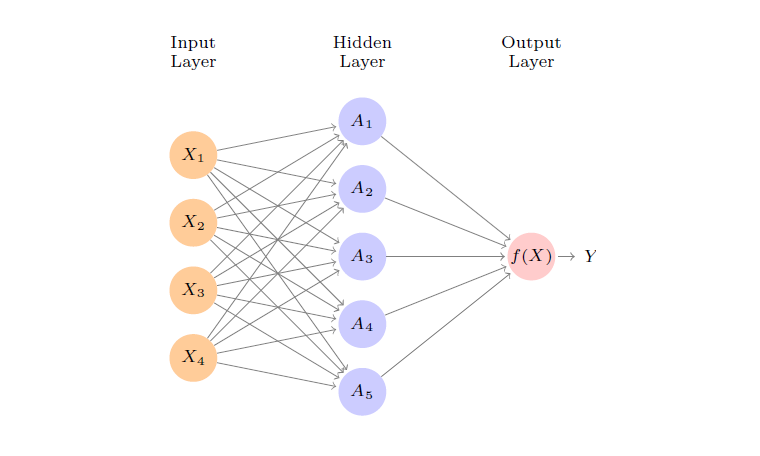


### Defining the Neural Network Class

Here’s an example neural network for classifying images in the FashionMNIST dataset:

In [ ]:
import torch
from torch import nn

class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28 * 28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

# Create an instance of the model and move it to the device
device = "cuda" if torch.cuda.is_available() else "cpu"
model = NeuralNetwork().to(device)
print(model)


- **Flatten Layer**: Converts each 2D `28x28` image into a 1D array of `784` pixels.

- **Sequential Layer**: Combines several layers in sequence for a streamlined architecture. Here, it includes three linear layers and ReLU activations.

- **Forward Method**: Defines how data flows through the network, specifying the order in which layers are applied to the input data.


### Running the Model

To use the model, we pass the input data, which will automatically call the `forward` method.

In [ ]:
X = torch.rand(1, 28, 28, device=device)   # Random input tensor simulating a 28x28 image
logits = model(X)                          # Pass the input through the model
pred_probab = nn.Softmax(dim=1)(logits)    # Apply Softmax to get probabilities
y_pred = pred_probab.argmax(1)             # Get the predicted class
print(f"Predicted class: {y_pred}")

- **Softmax Layer**: Converts logits (raw scores) into probabilities by scaling values to `[0, 1]`, ensuring that the sum of all probabilities is equal to `1`.


### 3. Understanding Model Layers

---
- **`nn.Flatten`**: A layer reshapes each 2D `28x28` image in a batch to a 1D vector of `784` pixels. This is essential before feeding the image data into linear layers.



In [ ]:
input_image = torch.rand(3, 28, 28)
flatten = nn.Flatten()
flat_image = flatten(input_image)
print(flat_image.size())  # Output: torch.Size([3, 784])

---

- **`nn.Linear`**: A linear layer applies a linear transformation with weights and biases, which are optimized during training. It takes input data of one dimension and transforms it to another dimension, based on the specified number of input (`in_features`) and output (`out_features`) features.


In [ ]:
layer1 = nn.Linear(in_features=28 * 28, out_features=20)
hidden1 = layer1(flat_image)
print(hidden1.size())  # Output: torch.Size([3, 20])

---

- **`nn.ReLU`**: ReLU (Rectified Linear Unit) is an activation function that introduces non-linearity into the model, enabling it to learn complex mappings. It replaces negative values in the data with zeros, allowing only positive values to pass through.

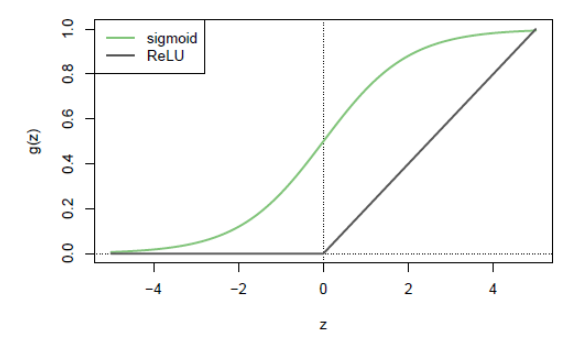

In [ ]:
print(f"Before ReLU: {hidden1}\n\n")
hidden1 = nn.ReLU()(hidden1)
print(f"After ReLU: {hidden1}")


- **`nn.Sequential`**: `nn.Sequential` is an ordered container of layers. It passes data through each layer in sequence, making it easier to build simple, linear models by stacking layers in the specified order.

In [ ]:
seq_modules = nn.Sequential(
    nn.Flatten(),
    nn.Linear(28 * 28, 512),
    nn.ReLU(),
    nn.Linear(512, 10)
)

- **`nn.Softmax`**: The final layer in many classification networks is `nn.Softmax`. It converts logits (raw scores) into probabilities that sum to `1`, which helps in interpreting the network’s outputs as class probabilities.

In [ ]:
softmax = nn.Softmax(dim=1)
pred_probab = softmax(logits)
pred_probab, sum(pred_probab)

In [ ]:
print(pred_probab.sum())

### 4. Model Parameters

Each layer in a neural network has parameters (weights and biases) that PyTorch tracks and updates during training. Using `parameters()` or `named_parameters()`, we can access these parameters.

- **`parameters()`**: Returns an iterator over all the parameters in the model.
- **`named_parameters()`**: Returns an iterator that provides both the parameter name and parameter tensor.

These functions are useful for inspecting and updating model parameters.


In [ ]:
for name, param in model.named_parameters():
    print(f"Layer: {name} | Size: {param.size()} | Values : {param[:2]} \n")

This provides:

- **Layer Names**: Name of each layer with parameters.
- **Parameter Size**: Size of weights/biases in each layer.
- **Values**: A preview of the parameter values.

---


# Automatic Differentiation with `torch.autograd`

In neural network training, **backpropagation** is the algorithm used to update model parameters by calculating the gradient of a loss function with respect to those parameters. PyTorch’s **automatic differentiation** feature, `torch.autograd`, computes these gradients automatically, making it easier to build and optimize neural networks.

---

## Computational Graphs with `torch.autograd`

A **computational graph** is a directed graph where:
- **Nodes** represent tensors, and
- **Edges** represent operations performed on these tensors.

`torch.autograd` constructs this graph dynamically, allowing it to compute gradients based on operations. Let’s walk through an example to illustrate this.


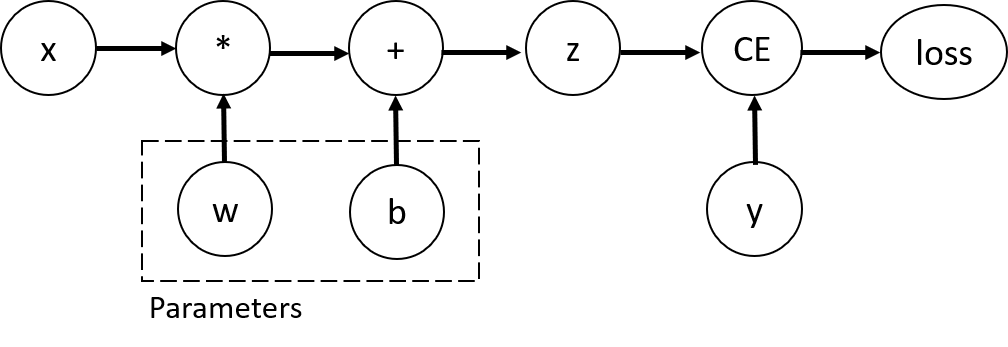

- **`w` and `b`**: These are the model parameters, with `requires_grad=True` indicating that we want to compute gradients with respect to them.
- **`loss`**: This is computed based on these parameters, forming the end node of our computational graph.


In [ ]:
import torch

# Define inputs, parameters, and expected output
x = torch.ones(5)  # input tensor
y = torch.zeros(3)  # expected output
w = torch.randn(5, 3, requires_grad=True)  # weights with gradient tracking
b = torch.randn(3, requires_grad=True)  # bias with gradient tracking

# Forward pass
z = torch.matmul(x, w) + b
loss = torch.nn.functional.binary_cross_entropy_with_logits(z, y)

z, loss

- **`w` and `b`**: These are the model parameters, with `requires_grad=True` indicating that we want to compute gradients with respect to them.
- **`loss`**: This is computed based on these parameters, forming the end node of our computational graph.


### Checking Gradient Functions

Each tensor involved in computation keeps track of its gradient function, accessible via `grad_fn`:

- **`grad_fn`**: This attribute shows the function that created the tensor, allowing you to trace back through the computational graph.
- **`z`**: This tensor was computed via an addition operation, and its `grad_fn` shows `<AddBackward0>`.
- **`loss`**: This tensor was computed using binary cross-entropy with logits, and its `grad_fn` is `<BinaryCrossEntropyWithLogitsBackward0>`.



In [ ]:
print(f"Gradient function for z = {z.grad_fn}")
print(f"Gradient function for loss = {loss.grad_fn}")

### Computing Gradients

To update model weights, we need to compute the gradient of the loss function with respect to `w` and `b`. We call `.backward()` on `loss` to perform backpropagation, which calculates gradients for all tensors with `requires_grad=True` in the computational graph.


In [ ]:
print(w.grad)
print(b.grad)

In [ ]:
loss.backward()
print(w.grad)
print(b.grad)

The gradients are now stored in `w.grad` and `b.grad`, representing how much `loss` changes with respect to `w` and `b`.

**Note**: Gradients are only stored in leaf nodes of the graph—those with `requires_grad=True`.


### Performing Multiple Backward Passes

By default, you can only call `.backward()` once on a computational graph to save memory. If you need to call `.backward()` multiple times, use `retain_graph=True`:



In [ ]:
#loss.backward(retain_graph=True)

### Disabling Gradient Tracking

In some scenarios, such as during inference or for certain operations, you may not need gradient tracking. Disabling gradient tracking can improve performance. Here are two ways to do this:

1. **Using `torch.no_grad()`**:
   - Wrap the code block where gradients are not needed within `torch.no_grad()` to temporarily disable gradient tracking.



In [ ]:
with torch.no_grad():
    z = torch.matmul(x, w) + b
print(z.requires_grad)  # Output: False

2. **Using `.detach()`**:

In [ ]:
z = torch.matmul(x, w) + b
z_det = z.detach()
print(z_det.requires_grad)  # Output: False

### How `torch.autograd` Builds and Uses Computational Graphs

In a forward pass, `autograd`:

1. Performs the operation to compute new tensors.
2. Adds the operation’s gradient function to the DAG (Directed Acyclic Graph).

When `.backward()` is called:

1. `autograd` traverses the graph from the root to the leaves.
2. Computes gradients for each tensor using the chain rule and accumulates them in the `.grad` attribute.

---

# Optimizing Model Parameters in PyTorch

With a defined model and prepared data, the next step is to train, validate, and test the model by optimizing its parameters. Training involves iteratively adjusting the model’s parameters using gradients to reduce errors, allowing the model to make more accurate predictions.

---

## Training Process Overview

The training process in PyTorch typically follows these steps:
1. **Forward Pass**: The model makes a prediction.
2. **Compute Loss**: The difference between the prediction and the actual value.
3. **Backpropagation**: Calculate gradients of the loss with respect to model parameters.
4. **Parameter Update**: Adjust parameters with an optimization algorithm (e.g., SGD).



In [ ]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

# Load datasets and dataloaders
training_data = datasets.FashionMNIST(root="data", train=True, download=True, transform=ToTensor())
test_data = datasets.FashionMNIST(root="data", train=False, download=True, transform=ToTensor())

train_dataloader = DataLoader(training_data, batch_size=64)
test_dataloader = DataLoader(test_data, batch_size=64)

# Define a simple neural network
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28 * 28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork()

---

### Setting Hyperparameters

Hyperparameters are adjustable parameters that govern the training process. The primary hyperparameters are:

- **Epochs**: Number of times the model goes through the entire dataset.
- **Batch Size**: Number of samples processed before updating model parameters.
- **Learning Rate**: Controls the size of updates to model parameters.

These hyperparameters significantly influence the training dynamics and model performance.


In [ ]:
learning_rate = 1e-3
batch_size = 64
epochs = 5

---

### Loss Function

The loss function quantifies how far the model's predictions are from the actual values. Common loss functions include:

- **`nn.MSELoss`**: Mean Squared Error, used for regression tasks.
- **`nn.CrossEntropyLoss`**: Combines `nn.LogSoftmax` and `nn.NLLLoss`, used for classification.

Choosing the appropriate loss function is essential for guiding the model's learning process effectively.


In [ ]:
loss_fn = nn.CrossEntropyLoss()

---

### Optimizer

An optimizer adjusts model parameters based on the computed gradients. Different optimization algorithms have unique characteristics; here we use **Stochastic Gradient Descent (SGD)**.

In [ ]:
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

### Optimization Process

Within the training loop, optimization happens in three steps:

1. **Zero Gradients**: Reset gradients to avoid accumulation.

2. **Backward Pass**: Compute gradients with `loss.backward()`.

3. **Step**: Update parameters with `optimizer.step()`.

The **learning rate** (`lr`) in SGD controls the step size for each parameter update, and the optimizer iteratively minimizes the loss function during training.



In [ ]:
#optimizer.zero_grad()

#loss.backward()

#optimizer.step()

---

### Implementing the Optimization Loop

We define two functions for training and evaluating the model:

- **`train_loop`**: Iterates over training data to update model parameters.
- **`test_loop`**: Evaluates the model’s performance on test data.

These functions allow us to organize the training and evaluation processes in a structured way.


In [ ]:
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()  # Set the model to training mode

    for batch, (X, y) in enumerate(dataloader):
        # Forward pass: Compute prediction and loss
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        loss.backward()  # Compute gradients
        optimizer.step()  # Update parameters
        optimizer.zero_grad()  # Reset gradients

        # Logging
        if batch % 100 == 0:
            loss_val, current = loss.item(), batch * len(X)
            print(f"loss: {loss_val:>7f}  [{current:>5d}/{size:>5d}]")


In [ ]:
def test_loop(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0
    model.eval()  # Set the model to evaluation mode

    with torch.no_grad():  # Disable gradient computation
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    accuracy = correct / size
    print(f"Test Error: \n Accuracy: {(100 * accuracy):>0.1f}%, Avg loss: {test_loss:>8f} \n")


- **`train_loop`**: Iterates over batches, performs a forward pass, computes the loss, performs backpropagation, and updates weights.

- **`test_loop`**: Evaluates the model without tracking gradients, reporting accuracy and average loss.


---

### Full Training Code

We run the training for multiple epochs, observing improvements in model performance. In this code:

- **Epochs**: The model trains and evaluates once per epoch.
- **`train_loop`**: Refines model parameters during training.
- **`test_loop`**: Reports accuracy and loss after each epoch, giving insight into model performance.


In [ ]:
# Initialize the loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# Train and evaluate the model
epochs = 5
for epoch in range(epochs):
    print(f"Epoch {epoch+1}\n-------------------------------")
    train_loop(train_dataloader, model, loss_fn, optimizer)
    test_loop(test_dataloader, model, loss_fn)
print("Training complete!")


# Saving and Loading Models in PyTorch

PyTorch offers multiple ways to save and load models. These options include saving just the model weights (recommended) or saving the entire model structure with weights. Below, we go through each approach.

---

## 1. Saving and Loading Model Weights

In PyTorch, model weights (parameters) are stored in a **state dictionary** (`state_dict`), which can be saved and loaded independently of the model structure. This method is efficient and a commonly used practice.

### Saving Model Weights

To save only the weights, use the `torch.save()` function on `model.state_dict()`:


In [ ]:
import torch

# Save the model weights to a file
torch.save(model.state_dict(), 'model_weights.pth')

### Loading Model Weights

To load model weights, you need to:

1. **Instantiate the Same Model Architecture**: Ensure the model architecture matches the one used during training.
2. **Load the State Dictionary**: Use `load_state_dict()` to load the saved weights into the model.

**Best Practice**: Use `weights_only=True` to limit the functions executed during unpickling to only those needed for loading the weights. This enhances security by preventing unnecessary code execution.

> **Note**: `model.eval()` disables certain behaviors (like dropout), which is essential for evaluation or inference to ensure consistent and accurate results.


In [ ]:
# Load the saved model weights
model.load_state_dict(torch.load('model_weights.pth', weights_only=True))
model.eval()  # Set to evaluation mode

In [ ]:
import torch
import matplotlib.pyplot as plt

# Function to predict and display images with predicted and actual labels in a 5x4 panel structure
def predict_and_show_images(dataloader, model, num_images=20):
    model.eval()  # Set model to evaluation mode
    images_shown = 0
    rows, cols = 5, 4  # 5x4 panel structure

    fig, axes = plt.subplots(rows, cols, figsize=(12, 12))  # Create the panel
    fig.suptitle("Predicted vs Actual Labels", fontsize=16)

    with torch.no_grad():  # Disable gradient computation during prediction
        for batch in dataloader:
            images, labels = batch
            outputs = model(images)  # Model prediction
            _, predicted = torch.max(outputs, 1)  # Select the class with the highest probability

            # Display images and prediction results in the panel
            for i in range(len(images)):
                if images_shown >= num_images:
                    plt.show()  # Show the plot once all images are displayed
                    return

                # Display image at the current panel position
                ax = axes[images_shown // cols, images_shown % cols]
                ax.imshow(images[i].squeeze(), cmap="gray")

                # Set title color based on prediction correctness
                title_color = "blue" if predicted[i].item() == labels[i].item() else "red"
                ax.set_title(f"Pred: {predicted[i].item()}, Actual: {labels[i].item()}", color=title_color)
                ax.axis("off")  # Hide axis

                images_shown += 1

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout for title space
    plt.show()

# Call the function to display prediction results (example with num_images=20)
predict_and_show_images(test_dataloader, model, num_images=20)


### 2. Saving and Loading the Entire Model (Including Architecture)

While saving just the weights is recommended, sometimes you may want to save the entire model structure along with its weights. This can be achieved by passing the entire model to `torch.save()`.

However, this approach has limitations:

- The saved model file includes the entire model class, meaning any changes in code structure may break compatibility when loading.


### Saving the Entire Model


In [ ]:
# Save the entire model (architecture + weights)
torch.save(model, 'model.pth')

### Loading the Entire Model

To load the saved model with its architecture, use `torch.load()`. Setting `weights_only=False` loads the complete model, including both its architecture and weights.

> **Caution**: Loading the entire model is generally discouraged in production. If the model structure changes or the class definition is not available, loading may fail. Saving and loading only `state_dict` is more flexible and recommended.



In [ ]:
# Load the entire model (architecture + weights)
model = torch.load('model.pth', weights_only=False)
model.eval()